# Objet

Répétition du cours N° 18 - [PANDAS PYTHON Tutoriel Français - Time Series](https://www.youtube.com/watch?v=qHRLG5hsW9I)

# Libs

In [3]:
import os
from ml_jpy_commons import *

c:\Users\franc\Projects\pepper_data-science_practising\Machine Learnia\data\ exists
c:\Users\franc\Projects\pepper_data-science_practising\Machine Learnia\data\csv\ exists


# Bitcoins : BTC-EUR

## Import des données

TODO : les récupérer directement sans passer par un DL manuel.


In [4]:
import pandas as pd
btc_eur_filename = 'BTC-EUR_20140917_20220905.csv'
btc_eur_filepath = os.path.join(csv_data_dir, btc_eur_filename)
btc_eur = pd.read_csv(btc_eur_filepath)
display(btc_eur)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625
...,...,...,...,...,...,...,...
2906,2022-09-01,19974.527344,20143.310547,19757.466797,20224.716797,20224.716797,30328353496
2907,2022-09-02,20223.644531,20370.679688,19897.353516,20064.068359,20064.068359,29261522450
2908,2022-09-03,20064.015625,20131.625000,19791.371094,19925.734375,19925.734375,23724552286
2909,2022-09-04,19926.121094,20170.126953,19729.541016,20172.349609,20172.349609,25480345215


<AxesSubplot:>

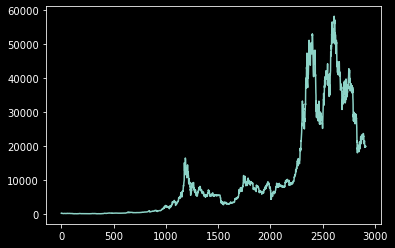

In [5]:
btc_eur.Close.plot()

## Passage à un index `Datetime`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html


<img src='https://github.com/Franck-PepperLabs/pepper_data-science_practising/blob/main/Machine%20Learnia/img/ml_18_1.jpg?raw=true' width=75%, height=75%></img>

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot:xlabel='Date'>

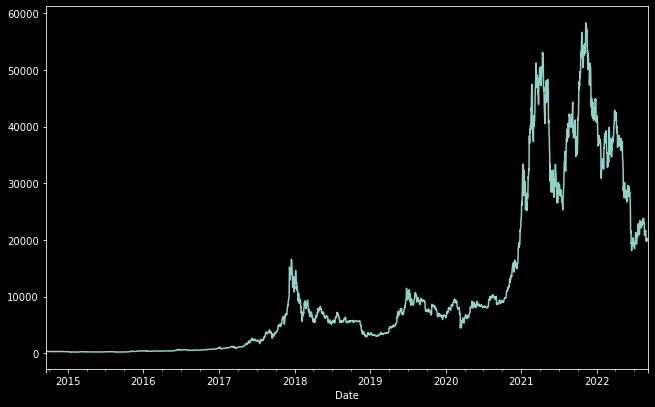

In [6]:
btc_eur = pd.read_csv(btc_eur_filepath, index_col='Date', parse_dates=True)
display(btc_eur.head())
figsize = (16.18 * 2/3, 10 * 2/3)
btc_eur.Close.plot(figsize=figsize)

## Indexing et slicing

Que de la joie !

<img src='https://github.com/Franck-PepperLabs/pepper_data-science_practising/blob/main/Machine%20Learnia/img/ml_18_2.jpg?raw=true' width=75%, height=75%></img>

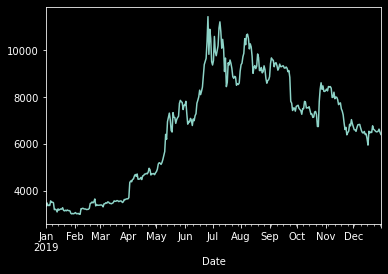

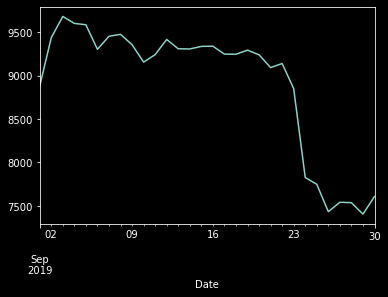

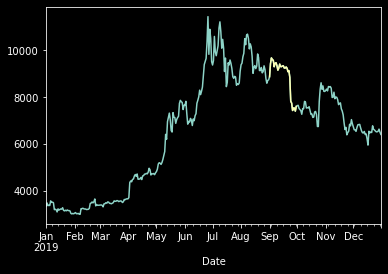

In [7]:
import matplotlib.pyplot as plt
btc_eur.loc['2019'].Close.plot(); plt.show()
btc_eur.loc['2019-09'].Close.plot(); plt.show()
btc_eur.loc['2019'].Close.plot()
btc_eur.loc['2019-09'].Close.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

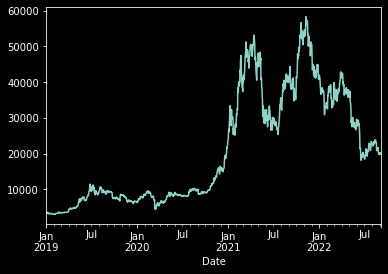

In [8]:
btc_eur.loc['2019':].Close.plot()

## Resample

<img src='https://github.com/Franck-PepperLabs/pepper_data-science_practising/blob/main/Machine%20Learnia/img/ml_18_3.jpg?raw=true' width=75%, height=75%></img>

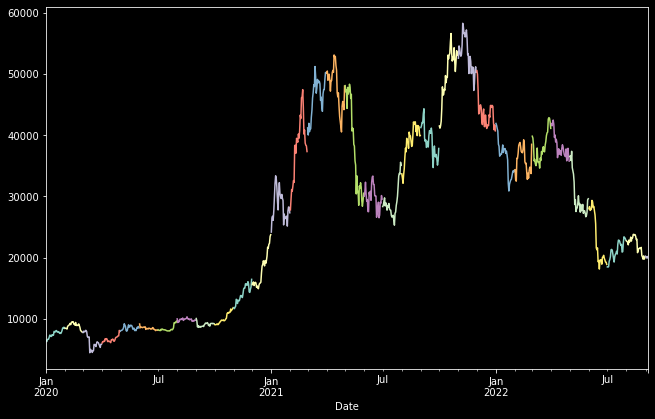

In [9]:
import matplotlib as mpl
mpl.style.use('dark_background')
btc_eur.loc['2020':'2022'].Close.resample('M').plot(figsize=figsize)
plt.show()

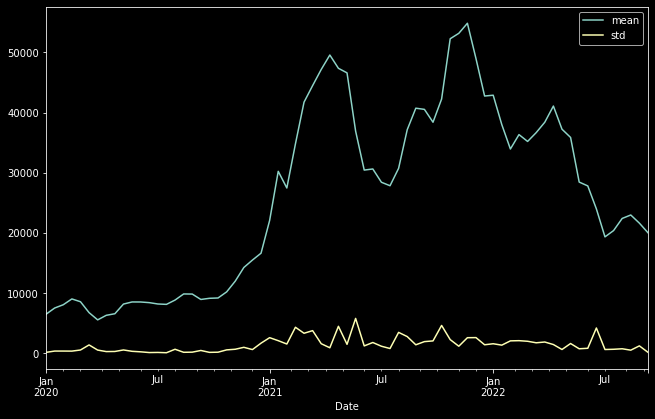

In [10]:
btc_eur.loc['2020':'2022'].Close.resample('2W').mean().plot(figsize=figsize)
btc_eur.loc['2020':'2022'].Close.resample('2W').std().plot(figsize=figsize)
plt.legend(['mean', 'std'])
plt.show()

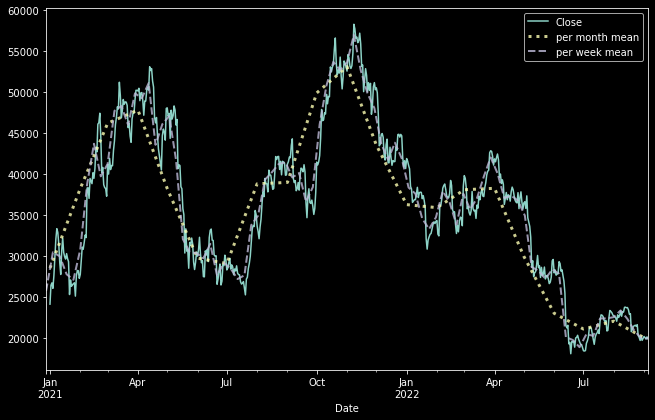

In [11]:
plt.figure(figsize=figsize)
btc_eur.loc['2021':'2022'].Close.plot()
btc_eur.loc['2021':'2022'].Close.resample('M').mean().plot(label='per month mean', lw=3, ls=':', alpha=.8)
btc_eur.loc['2021':'2022'].Close.resample('W').mean().plot(label='per week mean', lw=2, ls='--', alpha=.8)
plt.legend()
plt.show()

,mean,std,min,max
Date,,,,
2021-01-03,25800.389974,1423.001915,24165.556641,26760.720703
2021-01-10,30491.545759,2758.078498,26094.005859,33372.281250
2021-01-17,30009.262277,1375.535801,27786.228516,32250.857422
2021-01-24,27816.861049,1944.480989,25338.507813,30328.933594
2021-01-31,27143.953683,1086.374265,25144.740234,28272.550781


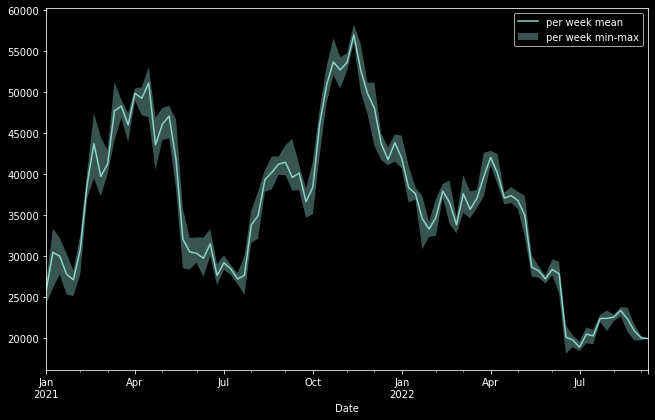

In [12]:
stats = btc_eur.loc['2021':].Close.resample('W').agg(['mean', 'std', 'min', 'max'])
display(stats.head())
plt.figure(figsize=figsize)
stats['mean'].plot(label='per week mean')
plt.fill_between(stats.index, stats['min'], stats['max'], alpha=.4, label='per week min-max')
plt.legend()
plt.show()


## Moyennes mobiles (moving averages)

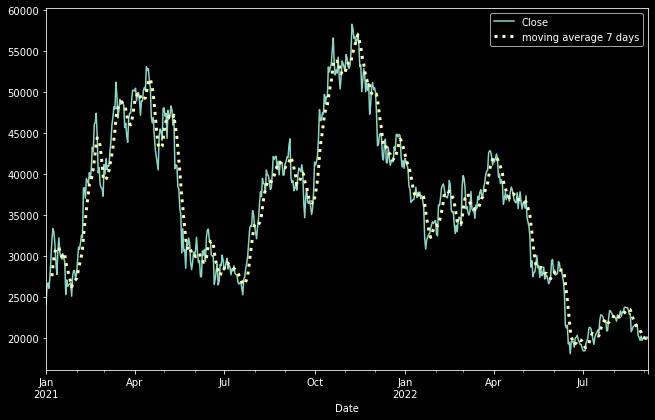

In [13]:
btc_eur_2021_ = btc_eur.loc['2021':].Close
plt.figure(figsize=figsize)
btc_eur_2021_.plot()
btc_eur_2021_.rolling(window=7).mean().plot(label='moving average 7 days', lw=3, ls=':')
plt.legend()
plt.show()

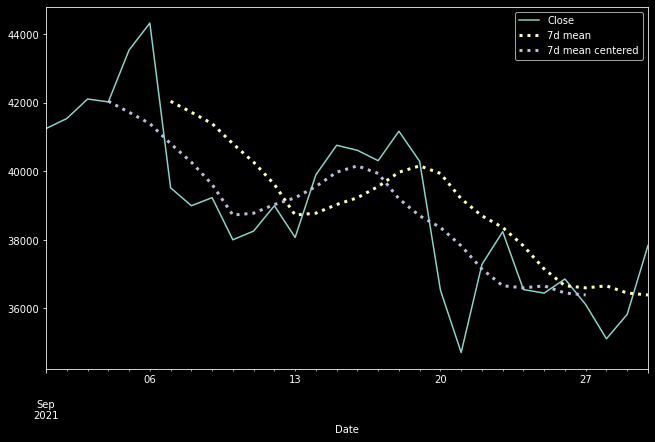

In [14]:
btc_eur_2021_09 = btc_eur_2021_['2021-09']
plt.figure(figsize=figsize)
btc_eur_2021_09.plot()
btc_eur_2021_09.rolling(window=7).mean().plot(label='7d mean', lw=3, ls=':')
btc_eur_2021_09.rolling(window=7, center=True).mean().plot(label='7d mean centered', lw=3, ls=':')
plt.legend()
plt.show()

## Moyenne mobile exponentielle

Pour la calculer, évidemment, ce doit être plutôt : $\bar{x}_t=\alpha\left(x_t + \left(1 - \alpha\right)\left(x_{t - 1} + \left(1 - \alpha\right)\left(x_{t - 2} + \left(1 - \alpha\right)\left(x_{t - 3}\right)\right)\right)...\right)$

<img src='https://github.com/Franck-PepperLabs/pepper_data-science_practising/blob/main/Machine%20Learnia/img/ml_18_4.jpg?raw=true' width=75%, height=75%></img>

<img src='https://github.com/Franck-PepperLabs/pepper_data-science_practising/blob/main/Machine%20Learnia/img/ml_18_5.jpg?raw=true' width=75%, height=75%></img>

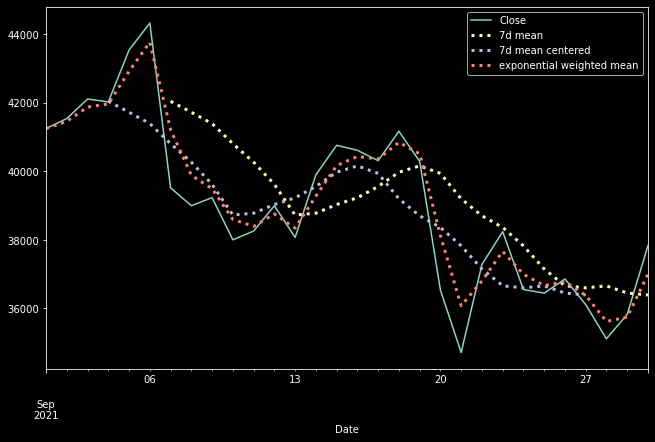

In [15]:
# btc_eur_2021_09 = btc_eur_2021_['2021-09']
plt.figure(figsize=figsize)
btc_eur_2021_09.plot()
btc_eur_2021_09.rolling(window=7).mean().plot(label='7d mean', lw=3, ls=':')
btc_eur_2021_09.rolling(window=7, center=True).mean().plot(label='7d mean centered', lw=3, ls=':')
btc_eur_2021_09.ewm(alpha=.6).mean().plot(label='exponential weighted mean', lw=3, ls=':')
plt.legend()
plt.show()

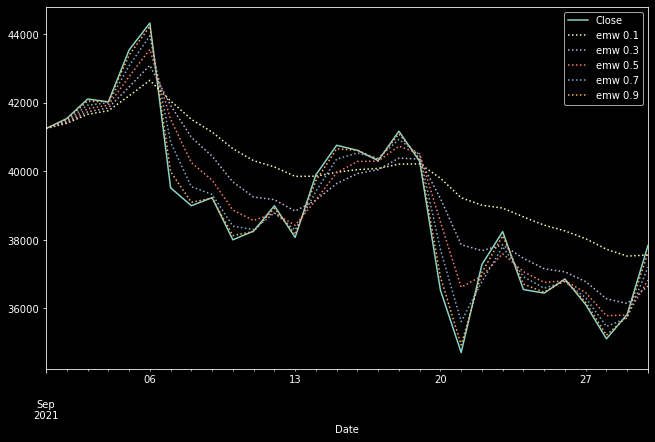

In [16]:
# btc_eur_2021_09 = btc_eur_2021_['2021-09']
import numpy as np
plt.figure(figsize=figsize)
btc_eur_2021_09.plot()
for alpha in np.arange(.1, 1, .2):
    btc_eur_2021_09.ewm(alpha=alpha).mean().plot(label=f'emw {round(alpha, 1)}', ls=':')
plt.legend()
plt.show()

## Fusion / jointure (merge == join)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...
2022-09-01,1547.869263,1601.976929,1529.630249,1593.866577,1593.866577,16513950191
2022-09-02,1593.706909,1640.695435,1560.048584,1584.668091,1584.668091,17792098146
2022-09-03,1584.661377,1586.912598,1548.951904,1564.224121,1564.224121,9561764447


C:\Users\franc\AppData\Local\Temp\ipykernel_26184\150701168.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  eth_eur['2019'].Close.plot(figsize=figsize)


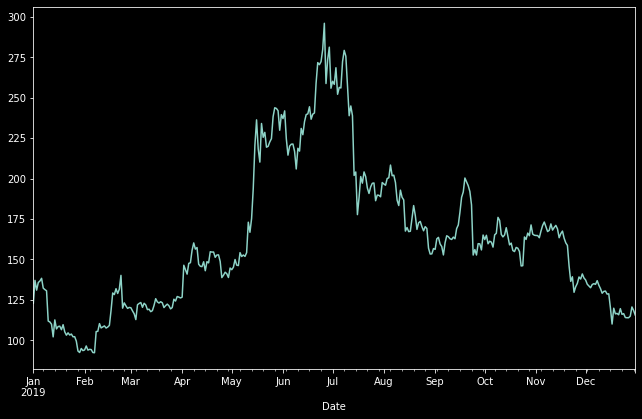

In [22]:
eth_eur_filename = 'ETH-EUR_20171111_20220905.csv'
eth_eur_filepath = os.path.join(csv_data_dir, eth_eur_filename)
eth_eur = pd.read_csv(eth_eur_filepath, index_col='Date', parse_dates=True)
display(eth_eur)
eth_eur['2019'].Close.plot(figsize=figsize)
plt.show()

Quelle différence entre `merge` et `join` ?
* bof https://www.geeksforgeeks.org/what-is-the-difference-between-join-and-merge-in-pandas/
* great https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas



In [25]:
merged = btc_eur.join(eth_eur, how='inner', lsuffix='_btc', rsuffix='_eth')
display(merged)

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,19974.527344,20143.310547,19757.466797,20224.716797,20224.716797,30328353496,1547.869263,1601.976929,1529.630249,1593.866577,1593.866577,16513950191
2022-09-02,20223.644531,20370.679688,19897.353516,20064.068359,20064.068359,29261522450,1593.706909,1640.695435,1560.048584,1584.668091,1584.668091,17792098146
2022-09-03,20064.015625,20131.625000,19791.371094,19925.734375,19925.734375,23724552286,1584.661377,1586.912598,1548.951904,1564.224121,1564.224121,9561764447


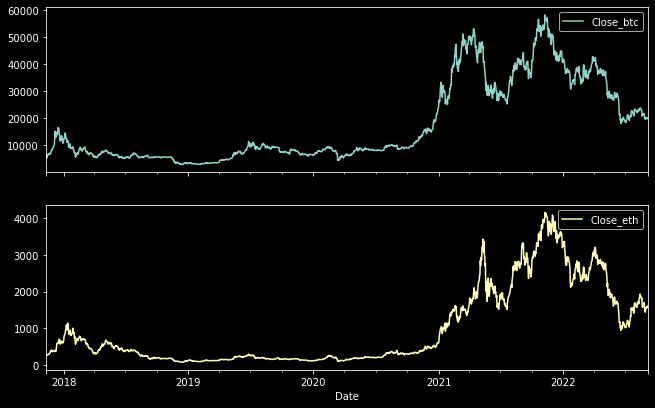

In [29]:
merged[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=figsize)
plt.show()

,Close_btc,Close_eth
Close_btc,1.000000,0.930275
Close_eth,0.930275,1.000000


<AxesSubplot:>

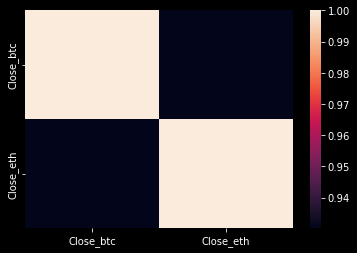

In [32]:
corr = merged[['Close_btc', 'Close_eth']].corr()
display(corr)
import seaborn as sns
sns.heatmap(corr)

# Stratégie de la tortue (à ne surtout pas utiliser^^)

<img src='https://github.com/Franck-PepperLabs/pepper_data-science_practising/blob/main/Machine%20Learnia/img/ml_18_6.jpg?raw=true' width=75%, height=75%></img>